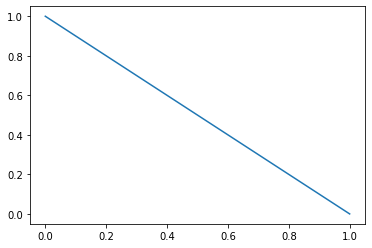

(-75, -56)
Import of general_pyNN.PYNNBackend failed due to:
No module named 'pyNN'


INFO:root:test
INFO:root:test


In [1]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.plot([0,1],[1,0])
plt.show()
import hide_imports

import sys
import traceback


In [2]:

def jrt(use_test,backend):
    use_test = hide_imports.TSD(use_test)
    use_test.use_rheobase_score = True
    edges = hide_imports.model_parameters.MODEL_PARAMS[backend]

    OM = hide_imports.OptMan(use_test,\
                backend=backend,\
                boundary_dict=edges,\
                protocol={'allen': False, 'elephant': True})

    return OM


def permutations(use_test,backend):
    use_test = hide_imports.TSD(use_test)
    use_test.use_rheobase_score = True
    edges = model_parameters.MODEL_PARAMS[backend]
    ga_out0 = use_test.optimize(edges,backend=backend,\
        protocol={'allen': False, 'elephant': True}, MU=2,NGEN=1)
    ga_out1 =  use_test.optimize(edges,backend=backend,\
        protocol={'allen': False, 'elephant': True},\
            MU=2,NGEN=1,seed_pop=ga_out0['pf'][0])

    
    dtc = ga_out1['pf'][0].dtc
    vm,plt = inject_and_plot_model(dtc.attrs,dtc.backend)

    return dtc, ga_out1['DO'], vm


In [3]:
test_frame = hide_imports.get_neab.process_all_cells()
test_frame.pop('Olfactory bulb (main) mitral cell',None)
OMObjects = []
backends = ["RAW","HH"]#"ADEXP","BHH"]
tt = test_frame['Neocortex pyramidal cell layer 5-6']
tt = tt.tests


# Round trip testing below

In [4]:

#for t in test_frame.values():
#    break
    
for b in backends:        
    OM = jrt(hide_imports.copy.copy(tt),b)
    OMObjects.append(OM)
rt_outs = []
from neuronunit.optimisation.optimization_management import inject_and_plot_model


In [ ]:
OM = OMObjects[0]
print(OM.backend)
x= {k:v for k,v in OM.tests.items() if 'mean' in v.observation.keys() or 'value' in v.observation.keys()}
OM.tests = hide_imports.TSD(OM.tests)

test_origin_target,new_tests = OM.simulate_data(OM.tests,OM.backend,OM.boundary_dict)
print([(k,v.observation) for k,v in new_tests.items()])

Random simulated data tests made
[<neuronunit.optimisation.data_transport_container.DataTC object at 0x7f9cf7153518>, <neuronunit.optimisation.data_transport_container.DataTC object at 0x7f9cf7153518>]
{'value': array(125.05166531) * pA, 'mean': array(125.05166531) * pA, 'std': array(125.05166531) * pA}
ranges OrderedDict([('C', (50, 200)), ('k', (0.7, 1.6)), ('vr', (-75, -56)), ('vt', (-50, -40)), ('vPeak', (25, 50)), ('a', (0.01, 0.03)), ('b', (-2, 15)), ('c', (-60, -40)), ('d', (10, 150)), ('dt', [0.005, 0.005])]) maybe ranges are wrong
[('RheobaseTest', array(125.05166531) * pA), ('InputResistanceTest', array(38666693.3039109) * kg*m**2/(s**3*A**2)), ('TimeConstantTest', array(5.42647114) * s), ('CapacitanceTest', array(1.40339674e-07) * s**4*A**2/(kg*m**2)), ('RestingPotentialTest', array(2.84217094e-14) * mV), ('InjectedCurrentAPWidthTest', array(6.1e-05) * s), ('InjectedCurrentAPAmplitudeTest', array([58.01797835]) * mV), ('InjectedCurrentAPThresholdTest', array(-2.17410283) * m

,RheobaseTest,InputResistanceTest,TimeConstantTest,CapacitanceTest,RestingPotentialTest,InjectedCurrentAPWidthTest,InjectedCurrentAPAmplitudeTest,InjectedCurrentAPThresholdTest,total
observations,125.05166530609131 pA,38666693.3039109 kg*m**2/(s**3*A**2),5.4264711410244315 s,1.4033967420936863e-07 s**4*A**2/(kg*m**2),-64.51067871643279 mV,0.0006100000000000001 s,[58.01797835124559 mV],-21.74102831351585 mV,NaN
predictions,164.51668739318848 pA,26617536.66865962 kg*m**2/(s**3*A**2),0.0030305979365503194 s,1.1385719025302018e-10 s**4*A**2/(kg*m**2),-56.0 mV,0.0004900000000000001 s,54.387865917892256 mV,-4.387865917892253 mV,NaN
scores,0.31559,-0.311616,-0.999442,-0.999189,2.99443e+14,-1.96721,-0.0625688,-inf,inf


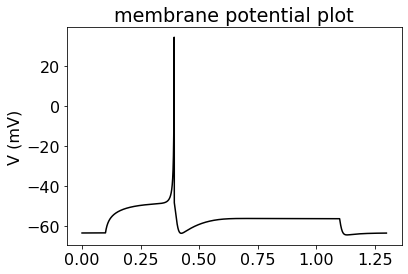

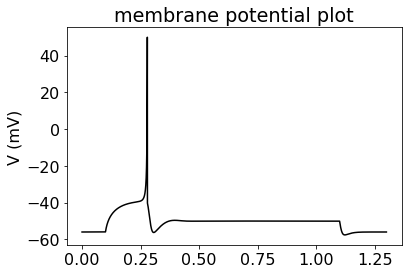

In [6]:
ga_out,ga_converged,test_origin_target,new_tests,closeness_ = OM.round_trip_test(OM.tests,OM.backend,OM.boundary_dict,NGEN = 8, MU = 8)
rt_out = [ga_out,ga_converged,test_origin_target,new_tests,closeness_]
rt_outs.append(rt_out)     
origin_target = rt_outs[-1][2][0]
inject_and_plot_model(origin_target.attrs,origin_target.backend)
found = rt_outs[-1][0]['pf'][0].dtc
inject_and_plot_model(found.attrs,found.backend)
found.obs_preds



In [ ]:
OM = OMObjects[1]
print(OM.backend)
x= {k:v for k,v in OM.tests.items() if 'mean' in v.observation.keys() or 'value' in v.observation.keys()}
OM.tests = hide_imports.TSD(OM.tests)
rt_out = OM.round_trip_test(OM.tests,OM.backend,OM.boundary_dict,NGEN = 4, MU = 4)
rt_outs.append(rt_out)     
origin_target = rt_outs[-1][2][0]
inject_and_plot_model(origin_target.attrs,origin_target.backend)
found = rt_outs[-1][0]['pf'][0].dtc
inject_and_plot_model(found.attrs,found.backend)


INFO:numba.transforms:finding looplift candidates


HH
Random simulated data tests made


In [ ]:
origin_target = rt_outs[0][2][0]
from neuronunit.optimisation.optimization_management import inject_and_plot_model
inject_and_plot_model(origin_target.attrs,origin_target.backend)
found = rt_outs[0][0]['pf'][0].dtc
inject_and_plot_model(found.attrs,found.backend)

In [ ]:
display(rt_outs[0][0]['pf'][0].dtc.backend)
display(rt_outs[0][0]['pf'][0].dtc.SA)


In [ ]:
display(rt_outs[1][0]['pf'][0].dtc.backend)
display(rt_outs[1][0]['pf'][0].dtc.SA)


In [ ]:

display(rt_outs[2][0]['pf'][0].dtc.backend)
display(rt_outs[2][0]['pf'][0].dtc.SM)


In [ ]:
try:
    display(rt_outs[3][0]['pf'][0].dtc.backend)
    display(rt_outs[3][0]['pf'][0].dtc.SM)
except:
    pass

In [ ]:

backends = ["RAW","HH","ADEXP","BHH"]


for t in test_frame.values():
    for b in backends:
        
        (dtc,DO,vm) = permutations(copy.copy(t),b)
        print(b)
        display(dtc.SM)
        display(dtc.obs_preds)
        plt.plot(vm.times,vm.magnitude)
        plt.show()




In [ ]:
(dtc,DO) = permutations(test_frame['Neocortex pyramidal cell layer 5-6'],"ADEXP")
display(dtc.SM)
display(dtc.obs_preds)

In [ ]:

backends = ["RAW","HH","BHH"]  



#for b in backends:
(dtc,DO) = permutations(test_frame['Neocortex pyramidal cell layer 5-6'],"RAW")


In [ ]:
backends = iter(["RAW","HH","BHH"])


from IPython.display import HTML, display

for b in backends:
    (dtc,DO) = permutations(test_frame['Neocortex pyramidal cell layer 5-6'],b)
    display(dtc.SM)
    display(dtc.obs_preds)



In [ ]:
#test_frame['Neocortex pyramidal cell layer 5-6']

##### 